# NumPy vs foor loops

In [ ]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [1]:
# Import libraries
import time
import numpy as np
import torch

In [2]:
# Matrix multiplication
def matrix_mult_transpose_a_out(A, B):
    matrix = []
    A_rows = A.shape[0]
    B_cols = B.shape[1]
    B_transpose = B.T
    for row_idx_A in range(len(A)):
        for row_idx_B in range(len(B_transpose)):
            matrix.append(sum(A[row_idx_A] * B_transpose[row_idx_B]))
    return np.round(np.array(matrix).reshape(A_rows, B_cols), 2)

In [3]:
# Compute matrix multiplication using for loops
def matrix_mult_loop(A, B):
    """
    Using for loops to perform matrix multiplication
    """
    matrix = np.zeros((len(A[0]), len(B[1])))
    for i in range(len(A)):
        for j in range(len(B[i])):
            matrix[i][j] = sum(A[i, :] * B[:, j])

    return np.round(matrix, 2)


# Using NumPy
def np_matrix_mult(A, B):
    """
    Using NumPy to perform matrix multiplication
    """
    return np.round(np.matmul(A, B))


# Using PyTorch Tensor
def tensor_matrix_mult(A, B):
    """
    Using PyTorch tensors to perform matrix multiplication
    """
    return torch.round(torch.matmul(A, B))


# Compute run time
def compute_time(func, A, B, sizes):
    """
    Function that tracks run time for each multiplication method
    """
    # Run time list
    run_time = []
    for s in sizes:
        # Start run
        start = time.time()
        
        # Perform matrix multiplication
        for _ in range(s):
            run = func(A,B)
    
        # End run
        end = time.time()
        run_time.append(round(end-start, 3))
        
    return run_time

In [4]:
def main():
    # Define matrices
    m = 10
    n = 10
    A = np.round(np.random.randn(m, n), 2)
    B = np.round(np.random.randn(n, m), 2)

    # Define sizes
    # sizes = [1000, 10000, 25000, 50000]
    sizes = [1000]
    
    # Compute run time
    loop_run = compute_time(func=matrix_mult_loop, A=A, B=B, sizes=sizes)
    numpy_run = compute_time(func=np_matrix_mult, A=A, B=B, sizes=sizes)
    tensor_run = compute_time(func=tensor_matrix_mult, A=torch.tensor(A), B=torch.tensor(B), sizes=sizes)

    # Print results
    print(f"Loop run time:    {loop_run}")
    print(f"NumPy run time:   {numpy_run}")
    print(f"Tensor run time:  {tensor_run}")
    
    return loop_run, numpy_run, tensor_run

In [ ]:
# Call main function
loop_run, numpy_run, tensor_run = main()
loop_run, numpy_run, tensor_run

## Plot graph

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

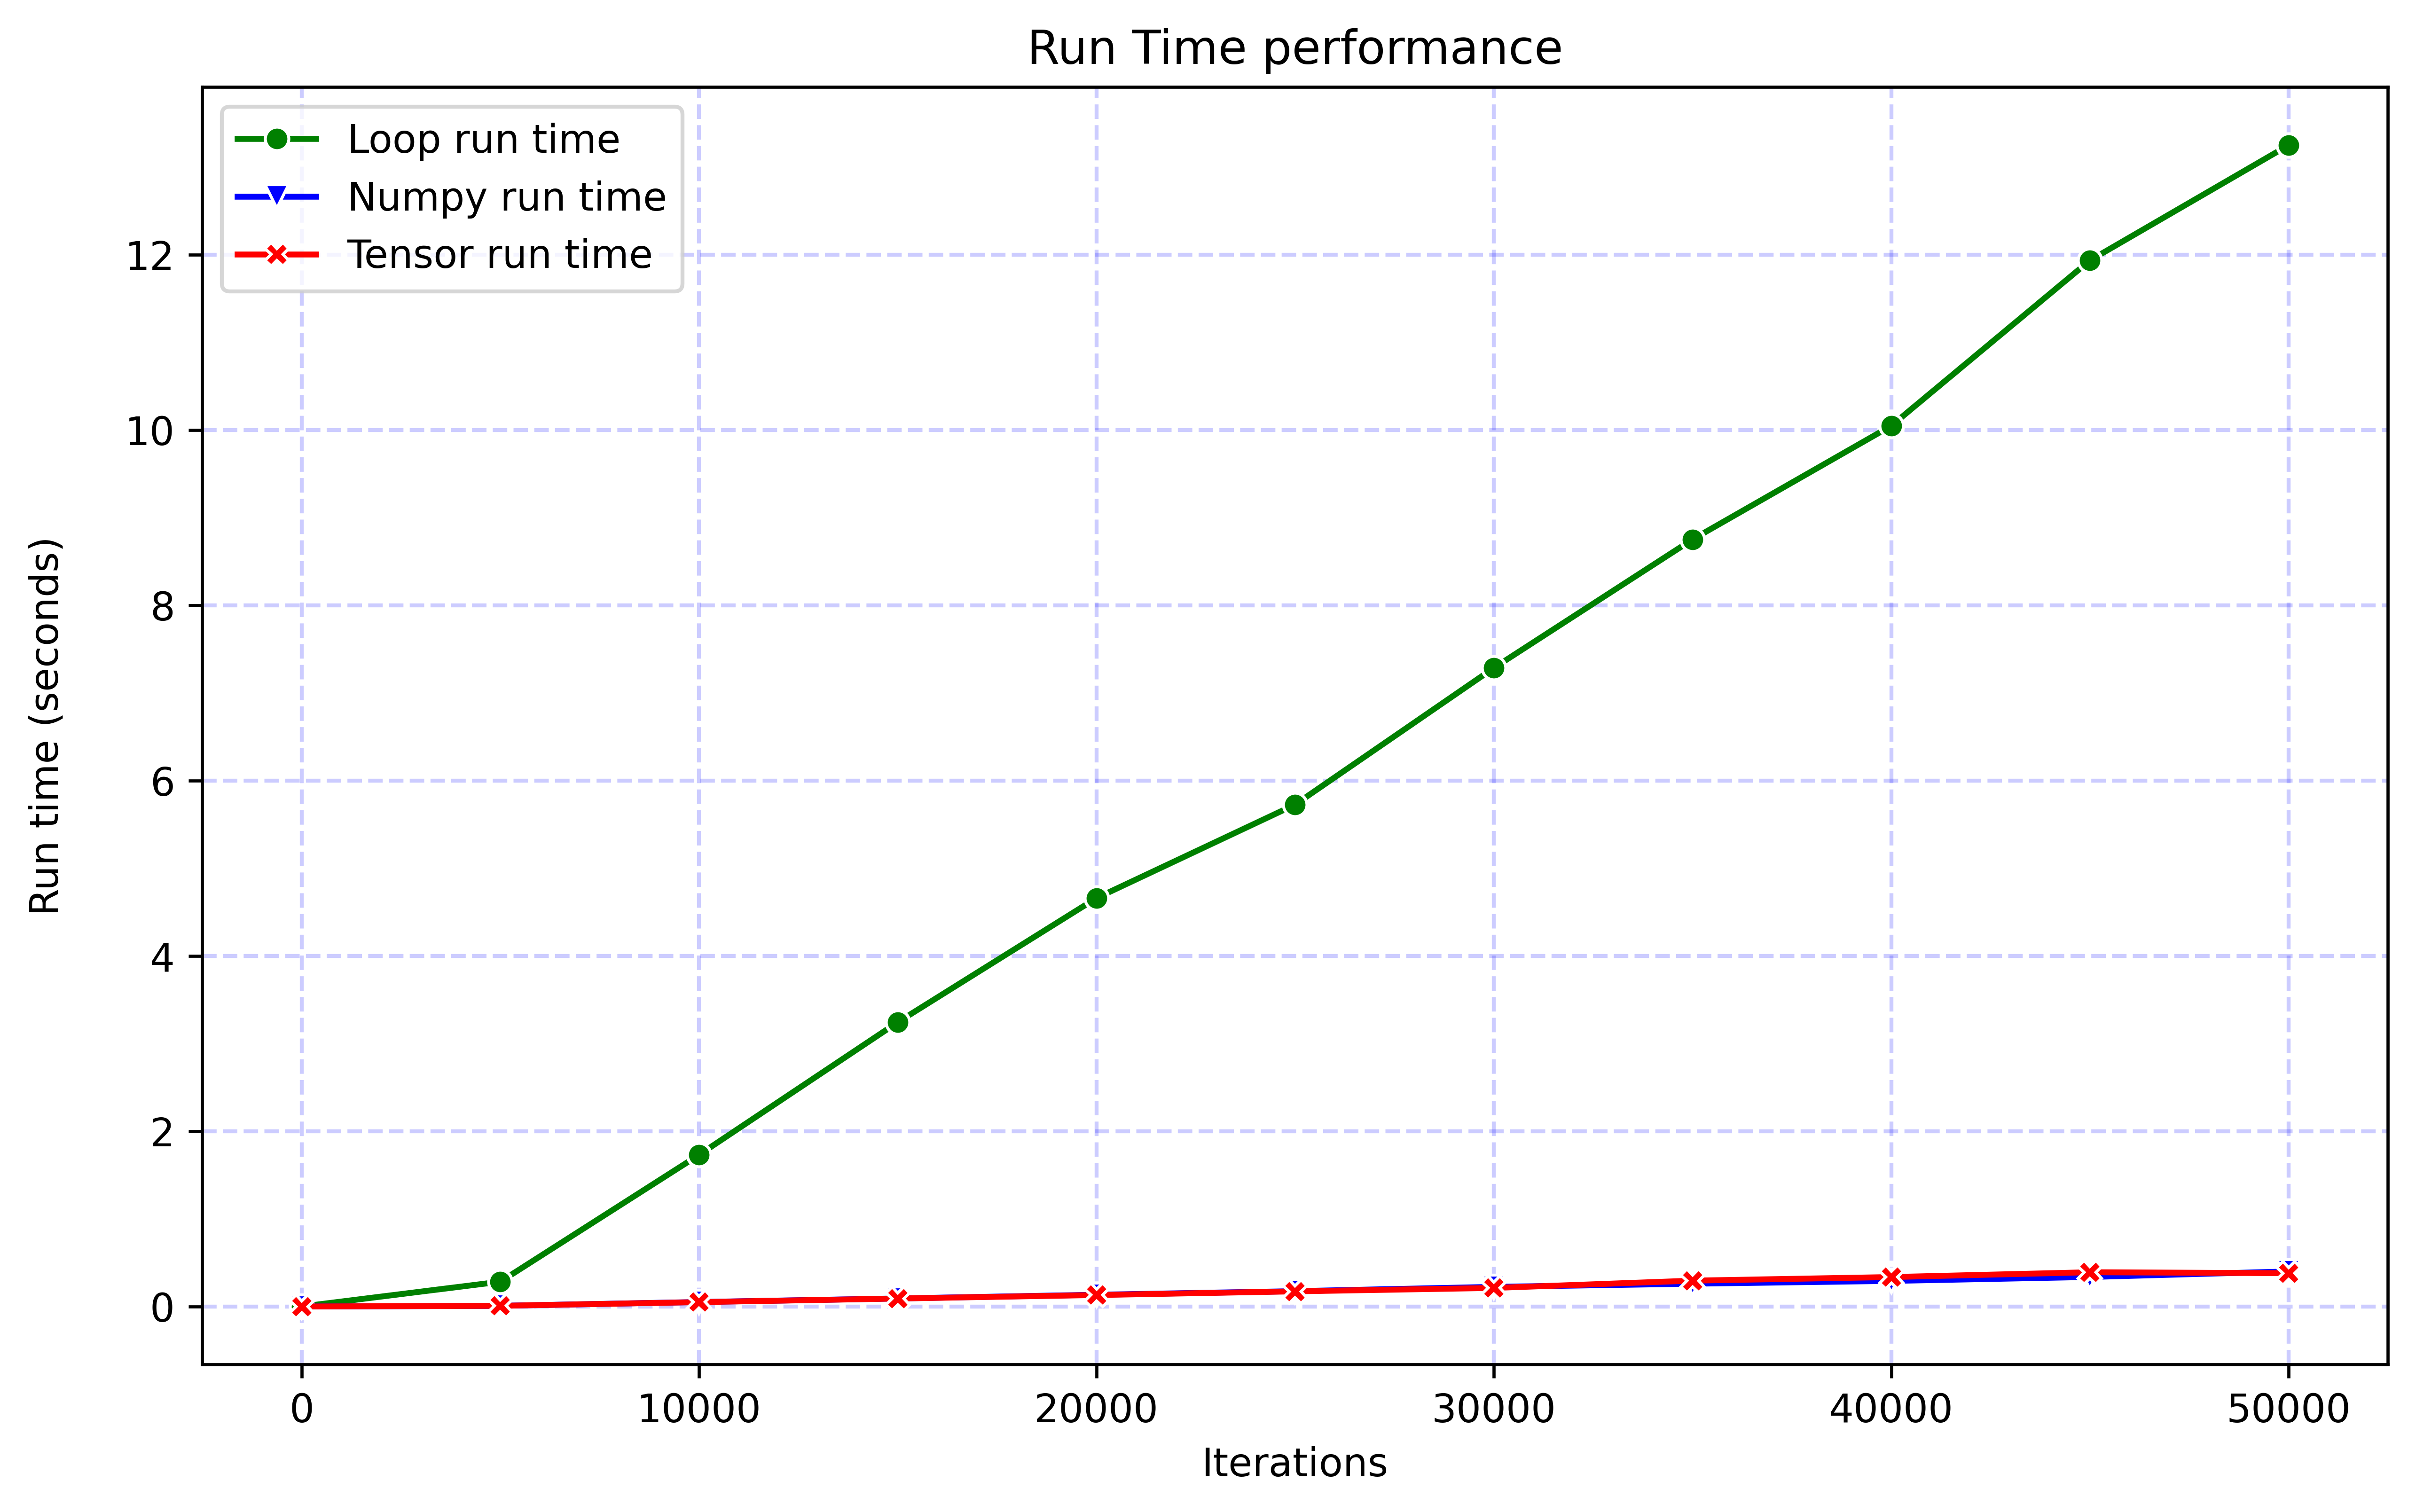

In [4]:
# Plot Linear Regression graph
plt.figure(figsize=(10,6), dpi=600)
plt.title('Run Time performance')
plt.xlabel("Iterations")
plt.ylabel("Run time (seconds)", rotation=90, labelpad=15)
sns.lineplot(x=sizes, y=loop_run, color='green', label='Loop run time', marker='o')
sns.lineplot(x=sizes, y=numpy_run, color='blue', label='Numpy run time', marker='v')
sns.lineplot(x=sizes, y=tensor_run, color='red', label='Tensor run time', marker='X')
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.legend(loc='upper left')
# plt.savefig('Linear_Regression.jpg')
plt.show()

In [2]:
loop_run = [0, 0.283, 1.73, 3.243, 4.659, 5.726, 7.285, 8.751, 10.047, 11.934, 13.249]
numpy_run = [0, 0.008, 0.051, 0.092, 0.134, 0.175, 0.224, 0.26, 0.292, 0.337, 0.4]
tensor_run = [0, 0.008, 0.05, 0.091, 0.131, 0.173, 0.212, 0.295, 0.336, 0.391, 0.38]

In [3]:
sizes = [i for i in range(0, 51000, 5000)]

## Running python file

In [23]:
%run -i Matrix-Multiplication-RunTime.py

In [24]:
help(main)

Help on function main in module __main__:

main(sizes)
    Function that performs run time computations
    return: loop_run, numpy_run, tensor_run



In [25]:
sizes = [i for i in range(0, 51000, 5000)]
loop_run, numpy_run, tensor_run = main(sizes=sizes)

In [26]:
# Print results
print_results(loop_run, numpy_run, tensor_run)

Loop run time:    [0.0, 1.621, 3.364, 4.66, 6.407, 7.981, 9.411, 11.662, 12.552, 13.84, 15.635]
NumPy run time:   [0.0, 0.045, 0.093, 0.139, 0.184, 0.231, 0.273, 0.326, 0.368, 0.414, 0.459]
Tensor run time:  [0.0, 0.039, 0.087, 0.115, 0.15, 0.19, 0.224, 0.261, 0.301, 0.339, 0.38]


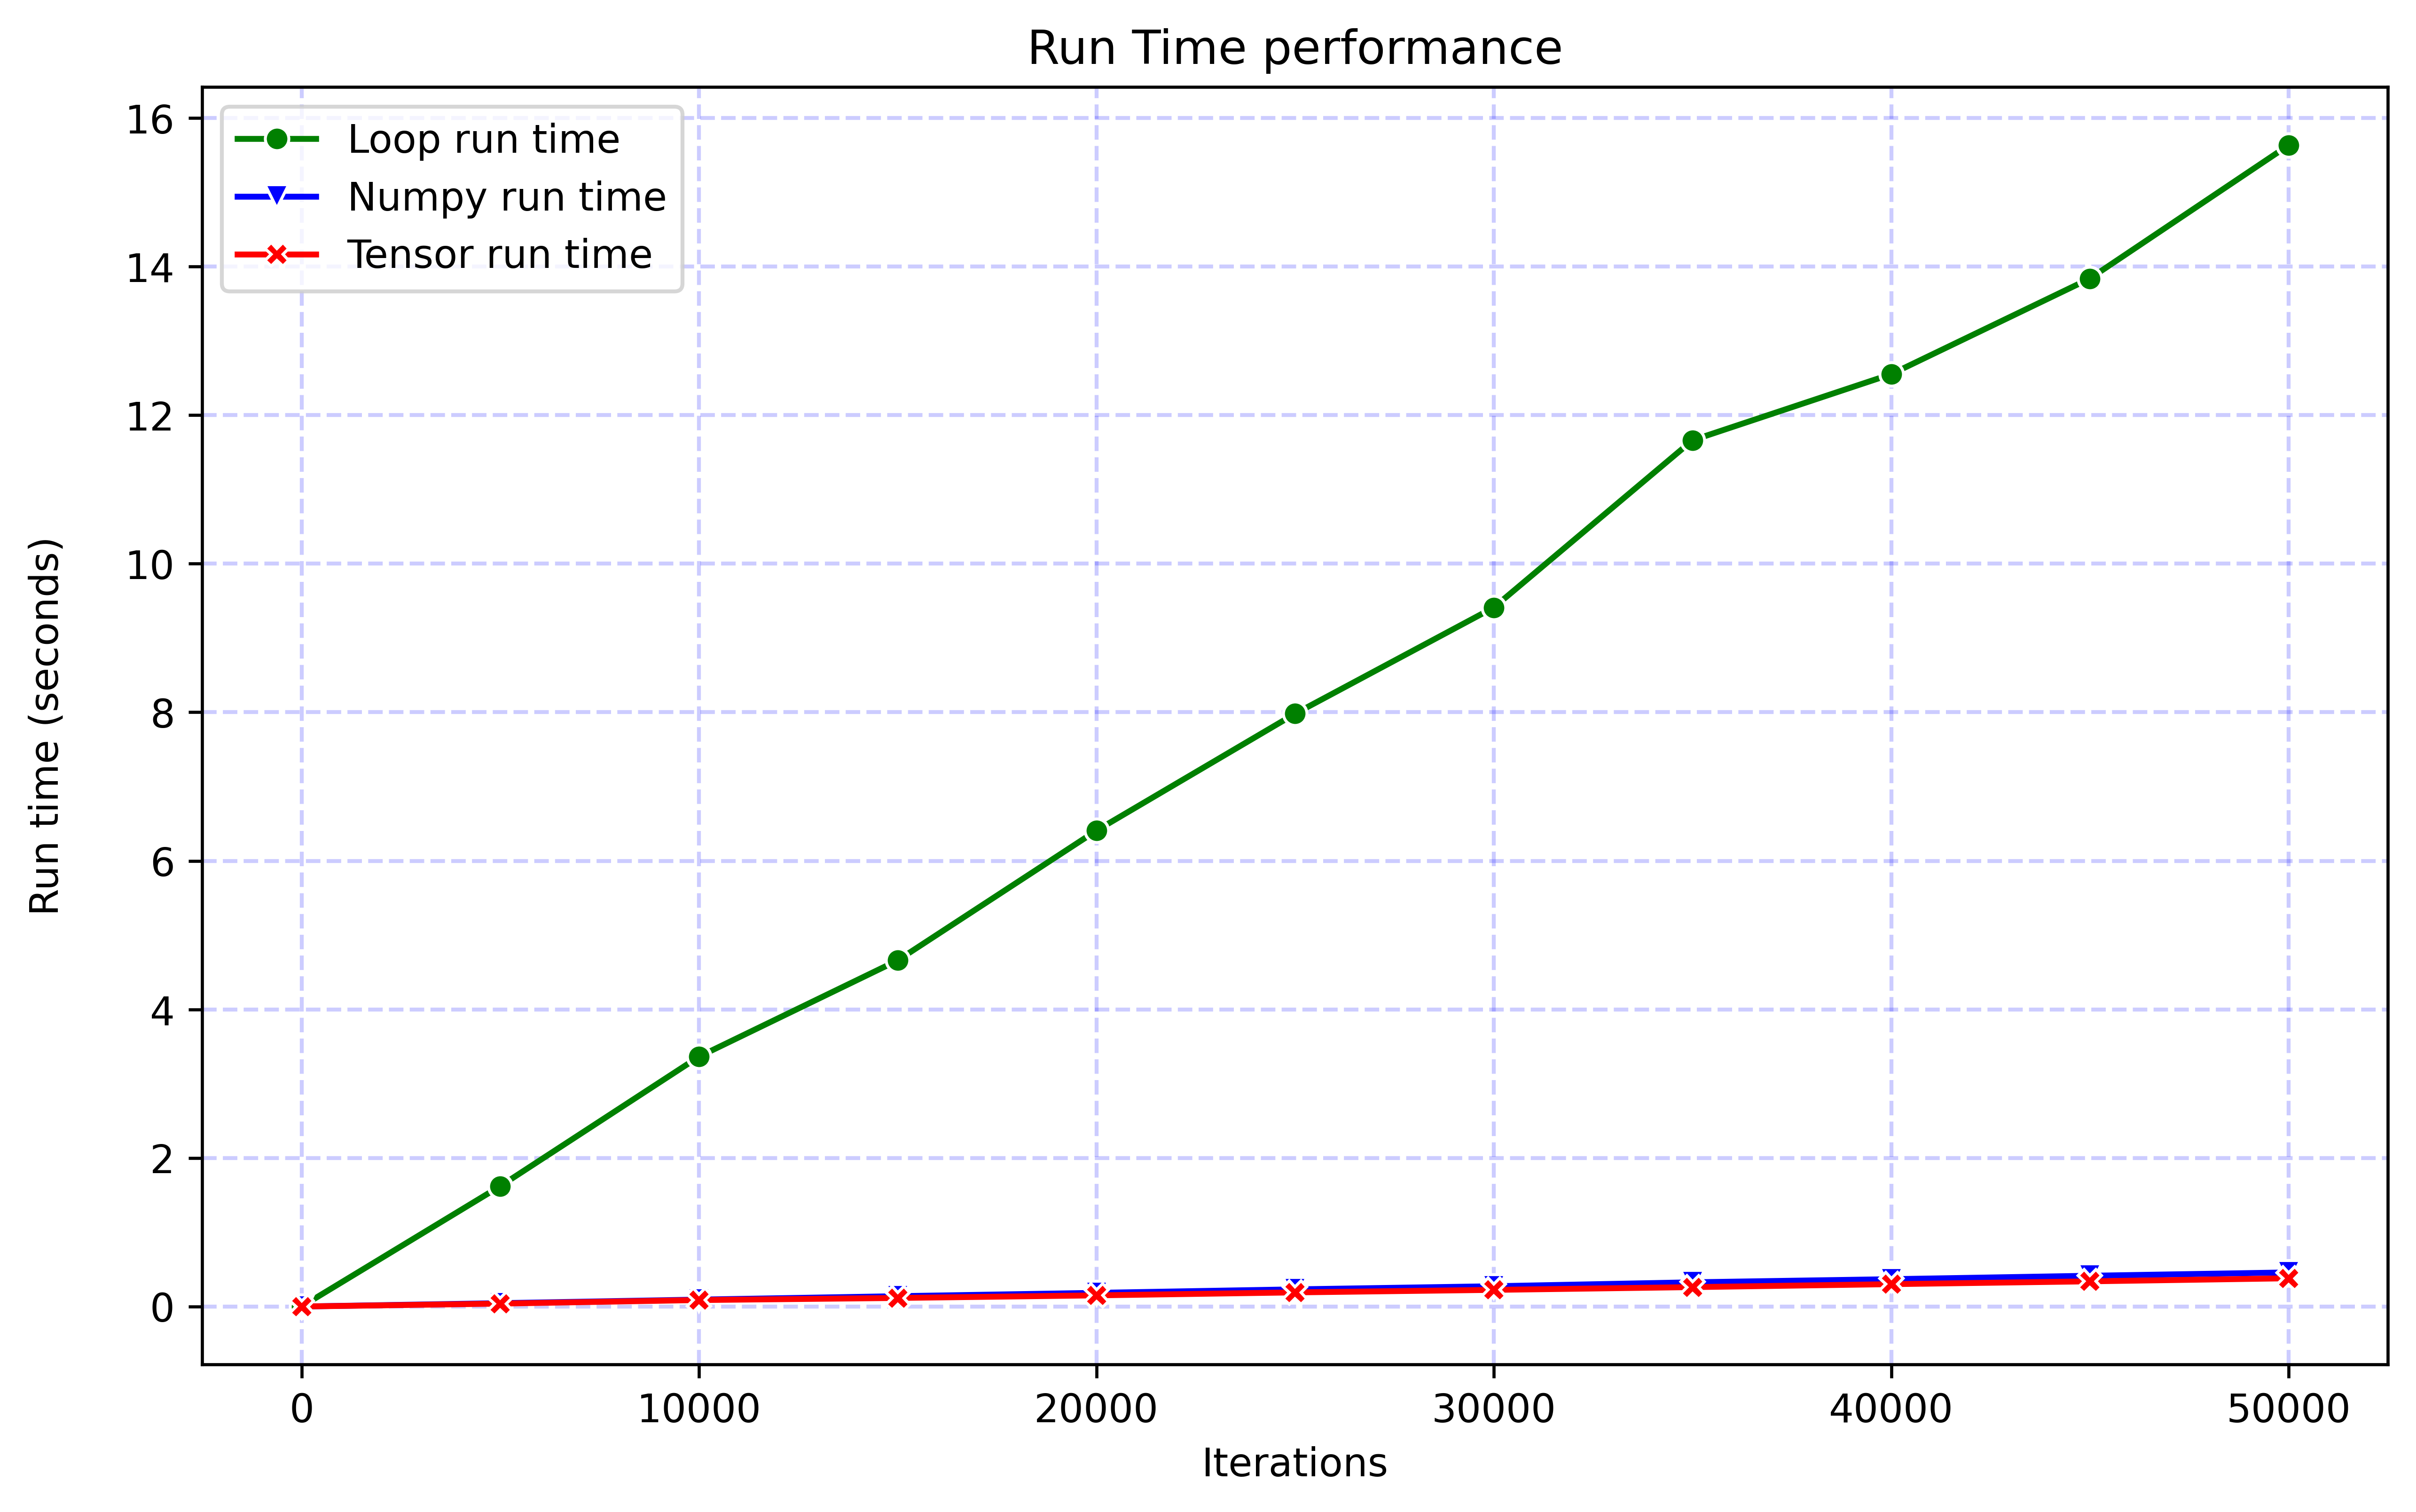

In [27]:
plot_graph(sizes, loop_run, numpy_run, tensor_run)